Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [1]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from snowline import ReactiveImportanceSampler

sampler = ReactiveImportanceSampler(paramnames, loglike, transform)

sampler.run()

[snowline]     from: [0.53792546 0.53723748]


[snowline]     error: [0.04 0.04]


FCN = 1.4677430496631244e-08 
 TOTAL NCALL = 33 
 NCALLS = 33 
 
 
 EDM = 1.4677430369811155e-08 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.55,0.000999999,,,0,1,No
1,x1,0.55,0.000999999,,,0,1,No


Maximum likelihood: L = -0.0 at:
    Hinz                0.5000 +- 0.0100
    Kunz                0.5000 +- 0.0100


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.55,0.000999999,,,0,1,No
1,x1,0.55,0.000999999,,,0,1,No


+,x0,x1
x0,1.00,0.00
x1,0.00,1.00


[snowline]     using correlated errors ...


[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 70.334%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 12 to 1 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1254


[snowline] Status: Have 681 total effective samples, done.



logZ = -11.976 +- 0.015

    Hinz                0.500 +- 0.010
    Kunz                0.5004 +- 0.0098


{'z': 6.293584472108259e-06,
 'zerr': 9.300060223923356e-08,
 'logz': -11.975979781185558,
 'logzerr': 0.014668931598961876,
 'ess': 0.8514474768439835,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 1254,
 'posterior': {'mean': [0.5002608341293729, 0.5003865101346606],
  'stdev': [0.01012646626267337, 0.00984666589078401],
  'median': [0.5002439650838486, 0.5004019207068424],
  'errlo': [0.4902334989001256, 0.4907545772342603],
  'errup': [0.5106129370666599, 0.5105850807222003]},
 'samples': array([[0.49978045, 0.48626368],
        [0.49666697, 0.49561548],
        [0.50300232, 0.49144892],
        ...,
        [0.48531604, 0.49093964],
        [0.51811644, 0.51175355],
        [0.51260966, 0.49110773]])}

This gave us error estimates and even estimated the evidence (Z)!

In [2]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 1254 times.


Visualisation
--------------------

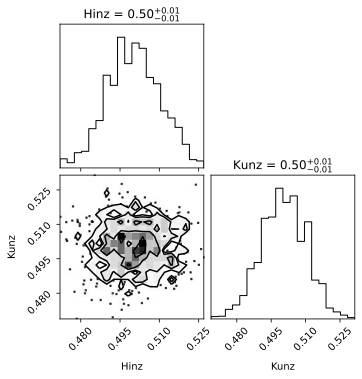

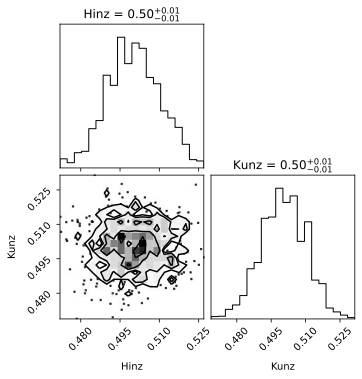

In [3]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [4]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

sampler = ReactiveImportanceSampler(paramnames, loglike_rosen, transform=transform_rosen)
sampler.run(min_ess=1000, max_ncalls=1000000)


[snowline]     from: [0.5388741  0.52725382]


[snowline]     error: [0.04 0.04]


FCN = 3.962918749048359e-05 
 TOTAL NCALL = 79 
 NCALLS = 79 
 
 
 EDM = 3.961197664515409e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.549983,0.0239932,,,0,1,No
1,x1,0.549945,0.0479796,,,0,1,No


Maximum likelihood: L = -0.0 at:
    Hinz                1.00 +- 0.48
    Kunz                1.00 +- 0.96


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.549983,0.0241077,,,0,1,No
1,x1,0.549945,0.048208,,,0,1,No


+,x0,x1
x0,1.00,1.00
x1,1.00,1.00


[snowline]     using correlated errors ...


[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 18.987%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 6 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1302


[snowline] Status: Have 49 total effective samples, sampling 560 next.


[snowline]     sampling efficiency: 6.187%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 4 components


[snowline] Importance sampling 560 ...


[snowline] Likelihood function evaluations: 1862


[snowline] Status: Have 502 total effective samples, sampling 784 next.


[snowline]     sampling efficiency: 36.977%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 4 components


[snowline] Importance sampling 784 ...


[snowline] Likelihood function evaluations: 2646


[snowline] Status: Have 968 total effective samples, sampling 1097 next.


[snowline]     sampling efficiency: 45.177%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 5 components


[snowline] Importance sampling 1097 ...


[snowline] Likelihood function evaluations: 3743


[snowline] Status: Have 704 total effective samples, sampling 1535 next.



logZ = -8.425 +- 0.033

    Hinz                0.99 +- 0.23
    Kunz                1.02 +- 0.46


{'z': 0.00021933063458513268,
 'zerr': 7.310211416112897e-06,
 'logz': -8.42493021970587,
 'logzerr': 0.032786250054478216,
 'ess': 0.21742899501877666,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 3743,
 'posterior': {'mean': [0.9882765270888314, 1.0206476601119672],
  'stdev': [0.23035403022633014, 0.45792082762630637],
  'median': [0.9949558467862047, 0.9941081833306153],
  'errlo': [0.7348199441804404, 0.5365333484805248],
  'errup': [1.2349101433793397, 1.53520463937053]},
 'samples': array([[0.90860785, 0.80798435],
        [0.90143056, 0.81620329],
        [0.74209776, 0.56693843],
        ...,
        [1.35598238, 1.85475193],
        [1.2045552 , 1.45928104],
        [1.39308055, 1.90852347]])}

This already took quite a bit more effort.

In [5]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 3743 times.


Lets see how well it did:

In [6]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]


Removed no burn in


(-0.5, 4.0)

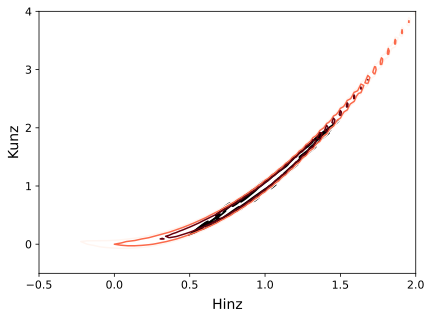

In [7]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-3, -2, -1], cmap='Reds')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the importance sampler was not able to perfectly follow the rosenbrock curvature. But it is a good start to roughly understand the uncertainties!

Removed no burn in


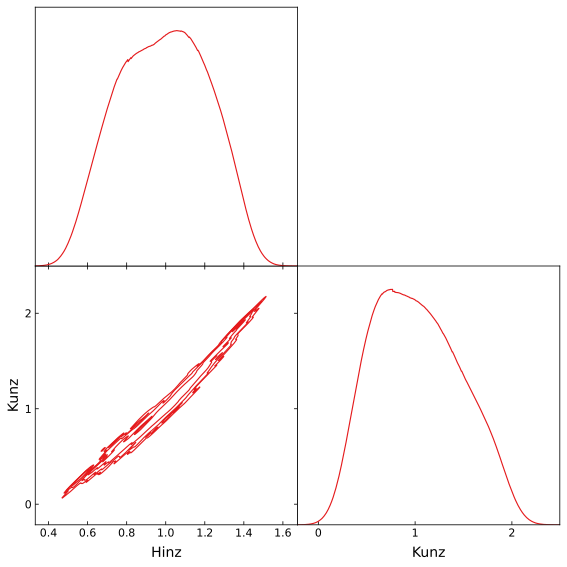

In [8]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);